In [275]:
import sys
import os
import numpy as np
import pandas as pd

# Add the src directory t\ the Python path

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# Now you can import the TimeSeriesDataset class
from src.TimeSeriesDataset import TimeSeriesDataset as TSD
from src.utils import download_data, weighted_mean
from src.mappings import value_mapping, ideology_mapping, social_complexity_mapping

Download datasets

In [276]:
dataset_PT = TSD(file_path='../datasets/power_transitions.xlsx')
dataset_100y = TSD(categories=['sc'], file_path="../datasets/50_yr_dataset.csv")

Dataset loaded from ../datasets/power_transitions.xlsx
Dataset loaded from ../datasets/50_yr_dataset.xlsx


impute MSP

In [277]:
Western_Christianity = [
"at_habsburg_1",
"at_habsburg_2",
"at_interwar_austria",
"cz_bohemian_k_1",
"cz_bohemian_k_2",
"de_bavaria_1",
"de_east_francia",
"de_empire_1",
"de_empire_2",
"de_empire_2_sub",
"de_empire_3",
"de_ns_germany",
"es_spanish_emp_2",
"fr_france_napoleonic",
"gb_anglo_saxon_1",
"gb_england_norman",
"gb_england_plantagenet",
"hu_arpad_dyn",
"hu_later_dyn",
"it_italy_k",
"it_lombard_k",
"it_republic_restoration",
"it_venetian_rep_3",
"it_venetian_rep_4",
"mx_mexico_1",
"mx_mexico_2",
"pl_jagiellonian_dyn",
"pl_piast_dyn_1",
"pl_piast_dyn_2",
"pl_poland_lithuania_commonwealth",
"pl_teutonic_order",
"pt_portuguese_emp_1",
"pt_portuguese_emp_2"
]

Protestant = [
"de_hohenzollern_1",
"gb_british_emp_1",
"in_east_india_co",
"us_antebellum",
"us_hawaii_k",
"us_united_states_of_america_contemporary",
"us_united_states_of_america_reconstruction",]

Orthodox_Christianity =["et_ethiopian_k",
"et_ethiopian_k_2",
"et_ethiopian_k_3",
"ru_moskva_rurik_dyn",
"ru_romanov_dyn_1",
"ru_romanov_dyn_2",
"ua_kievan_rus"]

Sunni_Islam = [
"bd_bengal_sultanate",
"bd_nawabs_of_bengal",
"bd_twelve_bhuyans",
"et_funj_sultanate",
"et_harar_emirate",
"et_jimma_k",
"et_kaffa_k",
"gu_futa_jallon",
"in_carnatic_sul",
"in_sur_emp",
"so_adal_sultanate",
"so_geledi_sultanate",
"so_ifat_sultanate",
"so_majeerteen_sultanate",
"tr_ottoman_emp_4",
"tr_turkey_rep",
"sa_rashidun_dyn",
"se_futa_toro_imamate",
"tz_tana",
"ni_bornu_emp",
"ni_hausa_k",
"ni_sokoto_cal"]

Ibadi_Islam = ["om_busaidi_imamate_1"
"Hinduism"
"bd_chandra_dyn"
"bd_deva_dyn"
"in_chola_emp"
"in_cholas_1"
'in_gauda_k'
"in_gurjara_pratihara_dyn"
"in_madurai_nayaks"
"in_nanda_dyn"
"in_pala_emp"
"in_pallava_emp_2"
"in_pandya_emp_1"
"in_pandya_emp_2"
"in_thanjavur_maratha_k"
"in_thanjavur_nayaks"]

Chinese_Religion=[
"cn_eastern_zhou_warring_states"
"cn_five_dyn"
"cn_southern_song_dyn"
"cn_wei_k"
"cn_eastern_zhou_warring_states"
"cn_qin_emp"]

Tengrism = [
"ru_golden_horde"
"ru_moskva_mongolian_period"]

Buddhism =[
"sl_anuradhapura_1",
"sl_anuradhapura_2",
"sl_anuradhapura_3",
"sl_dambadeniya",
"sl_jaffa_k",
"sl_polonnaruva"]

Maya_Religion = [
"gt_tikal_early_classic",
"gt_tikal_late_classic"]
religion_df = download_data("https://seshat-db.com/api/rt/official-religions/")
religion_df.reset_index(drop=True, inplace=True)

Downloaded 441 rows


In [278]:
print("Western_Christianity\n")

for i in range(len(Western_Christianity)):
    pol = Western_Christianity[i]
    if (religion_df['polity_new_name'] == pol).any():
        print(pol, religion_df.loc[religion_df['polity_new_name'] == pol, 'coded_value_religion_name'].values[0])
    else:
        # add row with new religion
        # Create a new DataFrame with the row to be added
        new_row = pd.DataFrame([{'polity_new_name': pol, 'coded_value_religion_name': 'Catholic Christianity'}])

        # Concatenate the new row with the existing DataFrame
        religion_df = pd.concat([religion_df, new_row], ignore_index=True)

print("\nProtestant\n")

for i in range(len(Protestant)):
    pol = Protestant[i]
    if (religion_df['polity_new_name'] == pol).any():
        print(pol, religion_df.loc[religion_df['polity_new_name'] == pol, 'coded_value_religion_name'].values[0])
    else:
        # add row with new religion
        # Create a new DataFrame with the row to be added
        new_row = pd.DataFrame([{'polity_new_name': pol, 'coded_value_religion_name': 'Western Christianity'}])

        # Concatenate the new row with the existing DataFrame
        religion_df = pd.concat([religion_df, new_row], ignore_index=True)
    
print("\nOrthodox Christianity\n")

for i in range(len(Orthodox_Christianity)):
    pol = Orthodox_Christianity[i]
    if (religion_df['polity_new_name'] == pol).any():
        print(pol, religion_df.loc[religion_df['polity_new_name'] == pol, 'coded_value_religion_name'].values[0])
    else:
        # add row with new religion
        # Create a new DataFrame with the row to be added
        new_row = pd.DataFrame([{'polity_new_name': pol, 'coded_value_religion_name': 'Orthodox Christianity'}])

        # Concatenate the new row with the existing DataFrame
        religion_df = pd.concat([religion_df, new_row], ignore_index=True)

print("\nSunni Islam\n")

for i in range(len(Sunni_Islam)):
    pol = Sunni_Islam[i]
    if (religion_df['polity_new_name'] == pol).any():
        print(pol, religion_df.loc[religion_df['polity_new_name'] == pol, 'coded_value_religion_name'].values[0])
    else:
        # add row with new religion
        # Create a new DataFrame with the row to be added
        new_row = pd.DataFrame([{'polity_new_name': pol, 'coded_value_religion_name': 'Sunni Islam'}])

        # Concatenate the new row with the existing DataFrame
        religion_df = pd.concat([religion_df, new_row], ignore_index=True)

print("\nIbadi Islam\n")

for i in range(len(Ibadi_Islam)):
    pol = Ibadi_Islam[i]
    if (religion_df['polity_new_name'] == pol).any():
        print(pol, religion_df.loc[religion_df['polity_new_name'] == pol, 'coded_value_religion_name'].values[0])
    else:
        # add row with new religion
        # Create a new DataFrame with the row to be added
        new_row = pd.DataFrame([{'polity_new_name': pol, 'coded_value_religion_name': 'Ibadi Islam'}])

        # Concatenate the new row with the existing DataFrame
        religion_df = pd.concat([religion_df, new_row], ignore_index=True)

print("\nChinese Religion\n")

for i in range(len(Chinese_Religion)):
    pol = Chinese_Religion[i]
    if (religion_df['polity_new_name'] == pol).any():
        print(pol, religion_df.loc[religion_df['polity_new_name'] == pol, 'coded_value_religion_name'].values[0])
    else:
        # add row with new religion
        # Create a new DataFrame with the row to be added
        new_row = pd.DataFrame([{'polity_new_name': pol, 'coded_value_religion_name': 'Chinese Religion'}])

        # Concatenate the new row with the existing DataFrame
        religion_df = pd.concat([religion_df, new_row], ignore_index=True)

print("\nTengrism\n")

for i in range(len(Tengrism)):
    pol = Tengrism[i]
    if (religion_df['polity_new_name'] == pol).any():
        print(pol, religion_df.loc[religion_df['polity_new_name'] == pol, 'coded_value_religion_name'].values[0])
    else:
        # add row with new religion
        # Create a new DataFrame with the row to be added
        new_row = pd.DataFrame([{'polity_new_name': pol, 'coded_value_religion_name': 'Tengrism'}])

        # Concatenate the new row with the existing DataFrame
        religion_df = pd.concat([religion_df, new_row], ignore_index=True)

print("\nBuddhism\n")

for i in range(len(Buddhism)):
    pol = Buddhism[i]
    if (religion_df['polity_new_name'] == pol).any():
        print(pol, religion_df.loc[religion_df['polity_new_name'] == pol, 'coded_value_religion_name'].values[0])
    else:
        # add row with new religion
        # Create a new DataFrame with the row to be added
        new_row = pd.DataFrame([{'polity_new_name': pol, 'coded_value_religion_name': 'Buddhism'}])

        # Concatenate the new row with the existing DataFrame
        religion_df = pd.concat([religion_df, new_row], ignore_index=True)

print("\nMaya Religion\n")

for i in range(len(Maya_Religion)):
    pol = Maya_Religion[i]
    if (religion_df['polity_new_name'] == pol).any():
        print(pol, religion_df.loc[religion_df['polity_new_name'] == pol, 'coded_value_religion_name'].values[0])
    else:
        # add row with new religion
        # Create a new DataFrame with the row to be added
        new_row = pd.DataFrame([{'polity_new_name': pol, 'coded_value_religion_name': 'Maya Religion'}])

        # Concatenate the new row with the existing DataFrame
        religion_df = pd.concat([religion_df, new_row], ignore_index=True)

Western_Christianity

it_venetian_rep_3 Roman Catholic Christianity
it_venetian_rep_4 Roman Catholic Christianity
pt_portuguese_emp_1 Roman Catholic Christianity
pt_portuguese_emp_2 Roman Catholic Christianity

Protestant

gb_british_emp_1 Anglican Christianity
in_east_india_co Anglican Christianity
us_hawaii_k Calvinist Christianity

Orthodox Christianity

et_ethiopian_k Ethiopian Orthodox Christianity
et_ethiopian_k_2 Ethiopian Orthodox Christianity
et_ethiopian_k_3 Ethiopian Orthodox Christianity

Sunni Islam

bd_bengal_sultanate Islam
bd_nawabs_of_bengal Islam
bd_twelve_bhuyans Islam
et_funj_sultanate Sunni Islam
et_harar_emirate Sunni Islam
et_jimma_k Oromo Religion
et_kaffa_k Kaffa Religion
gu_futa_jallon Islam
in_carnatic_sul Sufi Islam
in_sur_emp Islam
so_adal_sultanate Sunni Islam
so_geledi_sultanate Sufi Islam
so_ifat_sultanate Sufi Islam
so_majeerteen_sultanate Sunni Islam
tr_ottoman_emp_4 Sunni Islam
sa_rashidun_dyn Islam
se_futa_toro_imamate Islam
tz_tana Islam
ni_bornu_em

In [279]:
religions = dataset_PT.raw['PolityName'].apply(lambda x: religion_df.loc[religion_df.polity_new_name == x, "coded_value_religion_name"].iloc[0] if x in religion_df.polity_new_name.values else np.nan)
dataset_PT.raw['religion'] = religions
dataset_PT.scv['religion'] = religions

dataset_PT.scv_imputed['MSP'] = dataset_PT.scv['MSP']
for index,row in dataset_PT.scv.iterrows():
    if pd.isna(row['MSP']):
        if pd.isna(row['religion']):
            continue
        msp_inferred = (dataset_PT.scv.loc[(dataset_PT.scv.religion == row['religion'])&(dataset_PT.scv.MSP.notna()), 'MSP'])
        msp_inferred = msp_inferred.dropna()
        
        if len(msp_inferred) > 0:
            dataset_PT.scv_imputed.loc[index, 'MSP'] = msp_inferred.mean()

religions = dataset_100y.raw['PolityName'].apply(lambda x: religion_df.loc[religion_df.polity_new_name == x, "coded_value_religion_name"].iloc[0] if x in religion_df.polity_new_name.values else np.nan)
dataset_100y.raw['religion'] = religions
dataset_100y.scv['religion'] = religions

dataset_100y.scv_imputed['MSP'] = dataset_100y.scv['MSP']
for index,row in dataset_100y.scv.iterrows():
    if pd.isna(row['MSP']):
        if pd.isna(row['religion']):
            continue
        msp_inferred = (dataset_100y.scv.loc[(dataset_100y.scv.religion == row['religion'])&(dataset_100y.scv.MSP.notna()), 'MSP'])
        msp_inferred = msp_inferred.dropna()
        
        if len(msp_inferred) > 0:
            dataset_100y.scv_imputed.loc[index, 'MSP'] = msp_inferred.mean()

Add crisis variables

In [280]:
crisis_vars = [#'overturn'
              'predecessor_assassination'
              ,'intra_elite'
              ,'military_revolt'
              # ,'popular_uprising'
              # ,'separatist_rebellion'
            #   ,'external_invasion'
            #   ,'external_interference'
              ]
PT_mapping = {'PT_types':{}}
for col in crisis_vars:
    PT_mapping['PT_types'][col] = 1

dataset_PT.scv['Crisis'] = dataset_PT.raw.apply(lambda row: weighted_mean(row, PT_mapping, "PT_types", imputation='remove'), axis=1)
dataset_PT.scv_imputed['Crisis'] = dataset_PT.scv['Crisis']
dataset_PT.scv['duration'] = dataset_PT.raw['duration']
dataset_PT.scv_imputed['duration'] = dataset_PT.scv['duration']

Check for missing data

In [281]:
scale_cols = ['Pop','Terr','Cap','Hierarchy']
non_scale_cols = ['Government', 'Infrastructure', 'Information', 'Money']
print(f"Missing rows in PT, total number of rows {len(dataset_PT.scv)}")
print('Missing rows in scale columns')
print(dataset_PT.scv_imputed[scale_cols].isna().any(axis=1).sum())
print("Missing rows in non-scale columns")
print(dataset_PT.scv_imputed[non_scale_cols].isna().any(axis=1).sum())
print("Missing rows in MSP")
print(dataset_PT.scv_imputed[['MSP']].isna().any(axis=1).sum())
print("Total not complete rows")
print(dataset_PT.scv_imputed[scale_cols+non_scale_cols+['MSP']].isna().any(axis=1).sum())

Missing rows in PT, total number of rows 3133
Missing rows in scale columns
1065
Missing rows in non-scale columns
382
Missing rows in MSP
1201
Total not complete rows
1620


Compute scale and non-scale PCA

In [282]:
scale_cols = ['Pop','Terr','Cap']
scale_pca = dataset_100y.compute_PCA(cols = scale_cols, col_name = 'Scale', n_cols = 1, n_PCA= len(scale_cols))
dataset_PT.compute_PCA(cols = scale_cols, col_name = 'Scale', n_cols = 1, n_PCA= len(scale_cols), pca_func = scale_pca, contributions=True)

Explained variance by each PC:
PC1: 89.27%
PC2: 6.73%
PC3: 4.00%
there are some NaNs in the imputed dataset
Explained variance by each PC:
PC1: 89.27%
PC2: 6.73%
PC3: 4.00%
PC1 contributions:
Pop: 0.59
Terr: 0.58
Cap: 0.57


PCA(n_components=3)

In [283]:
inst_cols = ['Government', 'Infrastructure', 'Information', 'Money', 'MSP']
inst_pca = dataset_100y.compute_PCA(cols = inst_cols, col_name = 'Inst', n_cols = 1, n_PCA= len(inst_cols))
dataset_PT.compute_PCA(cols = inst_cols, col_name = 'Inst', n_cols = 1, n_PCA= len(inst_cols), pca_func = inst_pca, contributions=True)

there are some NaNs in the imputed dataset
Explained variance by each PC:
PC1: 72.68%
PC2: 13.68%
PC3: 6.54%
PC4: 4.46%
PC5: 2.64%
there are some NaNs in the imputed dataset
Explained variance by each PC:
PC1: 72.68%
PC2: 13.68%
PC3: 6.54%
PC4: 4.46%
PC5: 2.64%
PC1 contributions:
Government: 0.48
Infrastructure: 0.46
Information: 0.49
Money: 0.45
MSP: 0.33


PCA(n_components=5)

In [284]:
category_weight = [(d, len(social_complexity_mapping[d])) for d in social_complexity_mapping]
dataset_PT.scv['Comp'] = 0
dataset_PT.scv_imputed['Comp'] = 0
for col in non_scale_cols:
    dataset_PT.scv['Comp'] += dataset_PT.scv[col]*category_weight[non_scale_cols.index(col)][1]
    dataset_PT.scv_imputed['Comp'] += dataset_PT.scv_imputed[col]*category_weight[non_scale_cols.index(col)][1]

In [285]:
dataset_PT.save_dataset('../datasets', 'PT_dataset_imputed')

Dataset saved to ../datasets/PT_dataset_imputed.xlsx


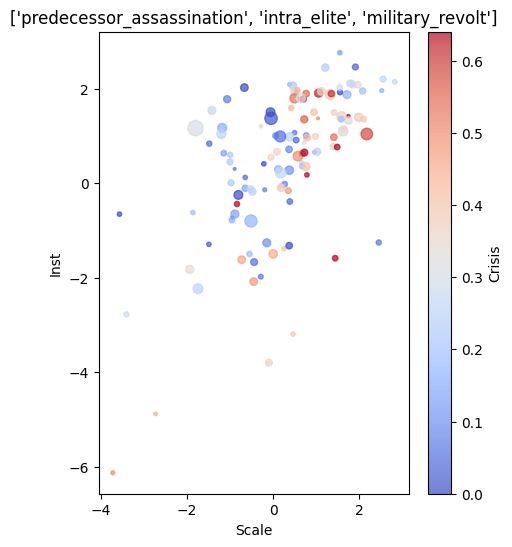

In [286]:
import matplotlib.pyplot as plt

dataset_plot = dataset_PT.scv_imputed
dataset_plot.sort_values('Crisis', inplace=True,ascending=True)
polity_group = dataset_PT.scv_imputed.groupby('PolityName')
fig, ax = plt.subplots(figsize=(5, 6))
# Assuming polity_group is a DataFrame or GroupBy object
mean_inst_1 = polity_group['Inst_1'].mean()
mean_scale_1 = polity_group['Scale_1'].mean()
mean_crisis = polity_group['Crisis'].mean()
num_observations = polity_group.size()

threshold = 0.
if threshold > 0:
    mean_inst_1 = mean_inst_1.loc[mean_crisis > threshold]
    mean_scale_1 = mean_scale_1.loc[mean_crisis > threshold]
    num_observations = num_observations[mean_crisis > threshold]
    mean_crisis = mean_crisis.loc[mean_crisis > threshold]


v_max = mean_crisis.max()*0.8
# Create a scatter plot
scatter = plt.scatter(mean_scale_1, mean_inst_1,
                      vmin = 0,
                      vmax = v_max,
                      c=mean_crisis,
                      cmap='coolwarm',
                      s=num_observations * 2,
                      alpha=0.7,
                      edgecolors=plt.cm.coolwarm(mean_crisis / v_max)
                      )

# Add a color bar
plt.colorbar(scatter, label='Crisis')
# add name of polity on each bubble

# Show the plot
plt.title(crisis_vars)
plt.ylabel('Inst')
plt.xlabel('Scale')
plt.show()


In [274]:
# fit to linear regressor 
x_cols = ['Scale_1', 'Inst_1']
y_col = 'Crisis'

print(f"Predicting {y_col} from {x_cols}")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Xy = dataset_PT.scv_imputed[[y_col]+x_cols].dropna()
X = Xy[x_cols]
y = Xy[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 score: {reg.score(X_test, y_test)}")
# print coefficients
# print("Coefficients")
# print(reg.coef_)

Xy.corr()

Predicting Crisis from ['Scale_1', 'Inst_1']
Mean squared error: 0.09777368163555333
R^2 score: 0.026597105801713594


,Crisis,Scale_1,Inst_1
Crisis,1.000000,0.177715,0.055235
Scale_1,0.177715,1.000000,0.501165
Inst_1,0.055235,0.501165,1.000000


In [269]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

def partial_correlation(x, y, z):
    """
    Calculate the partial correlation between x and y, controlling for z.

    Parameters:
        x, y, z: numpy arrays of the same length.

    Returns:
        Partial correlation coefficient and p-value.
    """
    # Reshape z for regression
    z = z.reshape(-1, 1) if z.ndim == 1 else z
    
    # Regress x on z
    model_xz = LinearRegression().fit(z, x)
    residual_x = x - model_xz.predict(z)
    
    # Regress y on z
    model_yz = LinearRegression().fit(z, y)
    residual_y = y - model_yz.predict(z)
    
    # Calculate correlation between residuals
    r, p_value = pearsonr(residual_x, residual_y)
    
    return r, p_value


# Generate some example data
x = Xy['Scale_1'].values
y = Xy['Crisis'].values
z = Xy['Inst_1'].values

# Partial correlation between x and y, controlling for z
r, p = partial_correlation(x, y, z)
print(f"Partial Correlation: {r:.5f}, p-value: {p}")

# Generate some example data
x = Xy['Inst_1'].values
y = Xy['Crisis'].values
z = Xy['Scale_1'].values

# Partial correlation between x and y, controlling for z
r, p = partial_correlation(x, y, z)
print(f"Partial Correlation: {r:.5f}, p-value: {p}")


Partial Correlation: 0.17364, p-value: 1.0753686836993321e-09
Partial Correlation: -0.03973, p-value: 0.1660575523456302


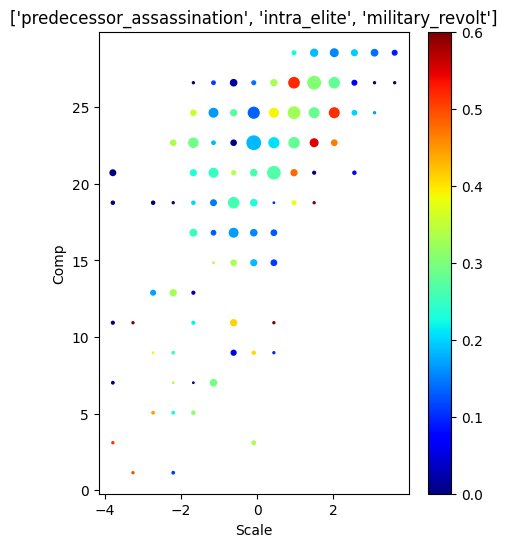

In [273]:
Xy = dataset_PT.scv_imputed[['Scale_1','Comp','Crisis']].dropna()

x = Xy["Scale_1"].values
y = Xy["Comp"].values
z = Xy["Crisis"].values

grid_size = 15

df = pd.DataFrame({'x': x, 'y': y, 'z': z})

# Define the grid
x_bins = np.linspace(min(x), max(x), grid_size + 1)
y_bins = np.linspace(min(y), max(y), grid_size + 1)

# Bin the data
df['x_bin'] = pd.cut(df['x'], bins=x_bins, labels=False, include_lowest=True)
df['y_bin'] = pd.cut(df['y'], bins=y_bins, labels=False, include_lowest=True)

x_bins = np.linspace(df.loc[df.x_bin == df.x_bin.min(),'x'].mean(),df.loc[df.x_bin == df.x_bin.max(),'x'].mean(), len(df.x_bin.unique()))
y_bins = np.linspace(df.loc[df.y_bin == df.y_bin.min(),'y'].mean(),df.loc[df.y_bin == df.y_bin.max(),'y'].mean(), len(df.y_bin.unique()))

# Group by the bins and calculate the mean of z
grid = df.groupby(['x_bin', 'y_bin'])['z'].mean().unstack()
grid_std = df.groupby(['x_bin', 'y_bin'])['z'].std().unstack()
counts = df.groupby(['x_bin', 'y_bin'])['z'].count().unstack()

fig, ax = plt.subplots(figsize=(5, 6))
x,y = np.meshgrid(x_bins, y_bins)
plt.scatter(x.flatten(), y.flatten(), c=grid.T.values.flatten(), cmap='jet', s=counts.T.values.flatten(), vmax = 0.6)
plt.colorbar()
plt.xlabel('Scale')
plt.ylabel('Comp')
plt.title(crisis_vars)
plt.show()

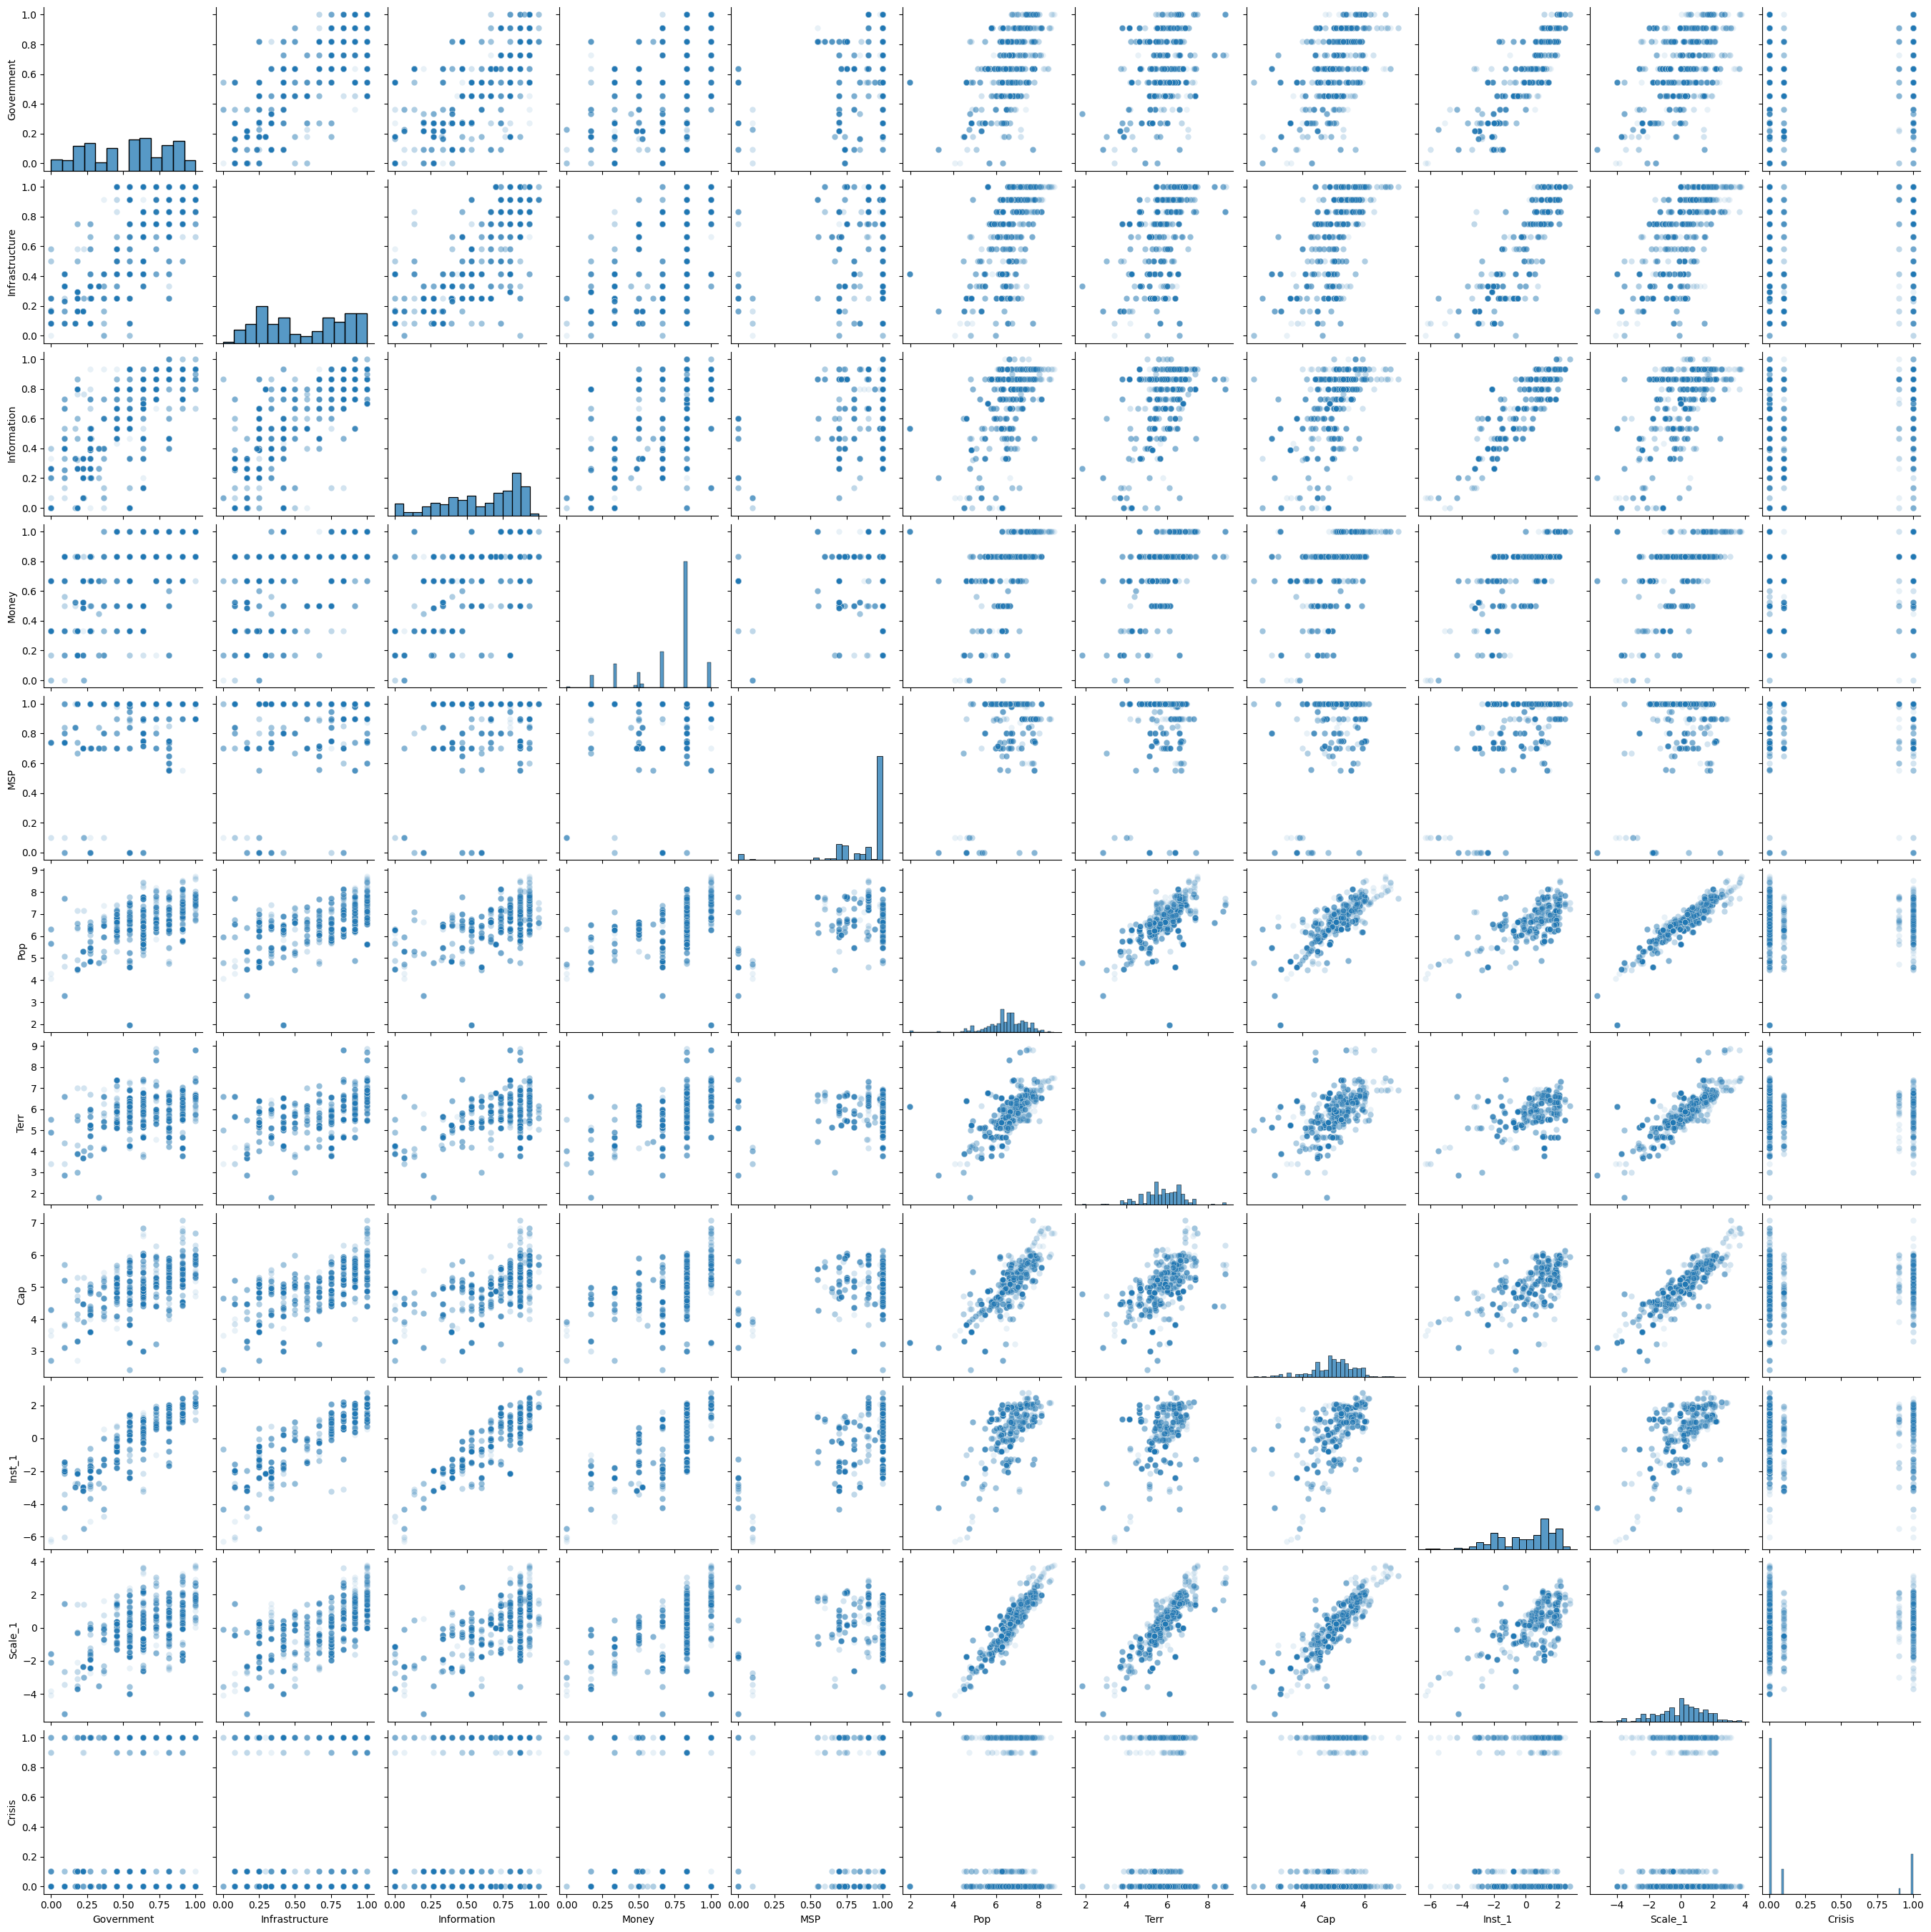

In [158]:
import seaborn as sns
sns.pairplot(dataset_PT.scv_imputed[inst_cols+scale_cols+['Inst_1', 'Scale_1', 'Crisis']], plot_kws={'alpha': 0.1})

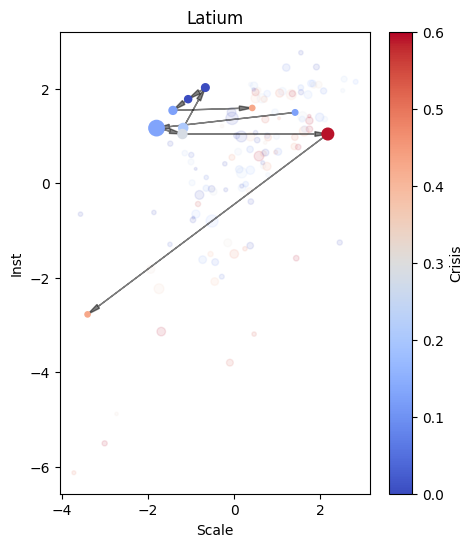

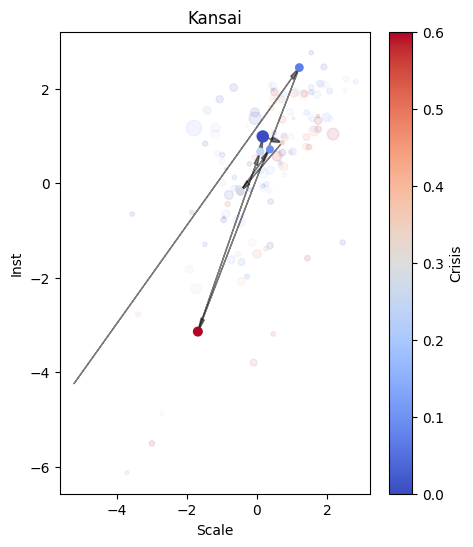

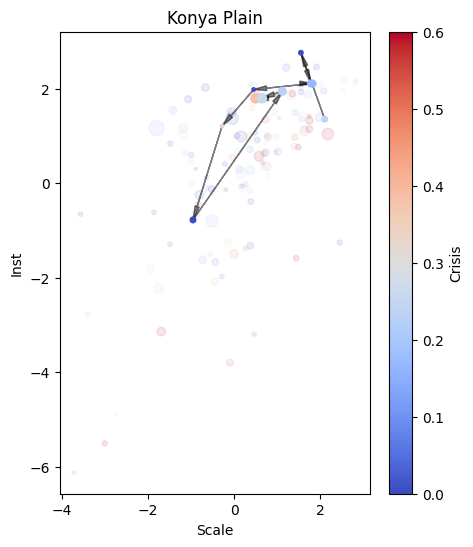

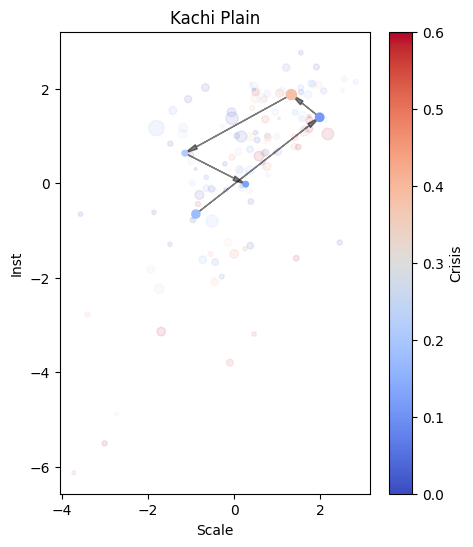

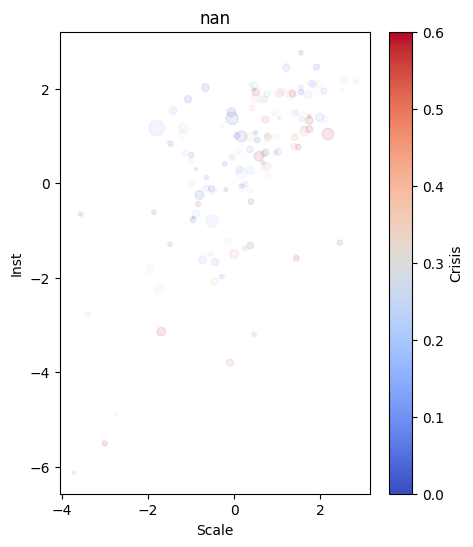

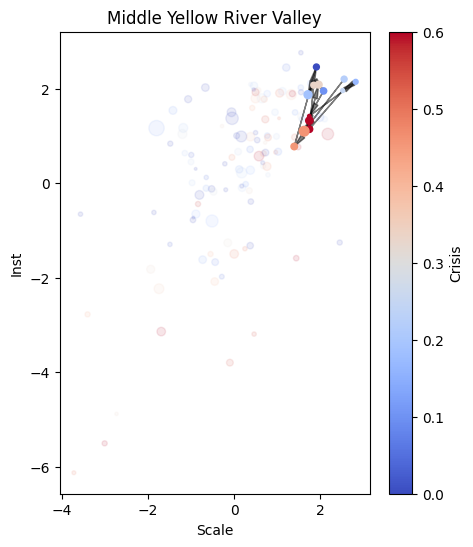

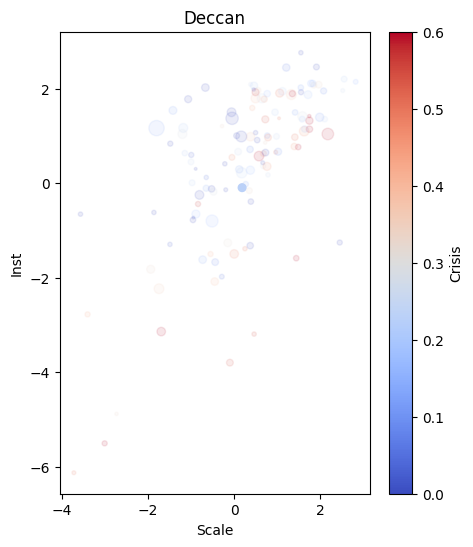

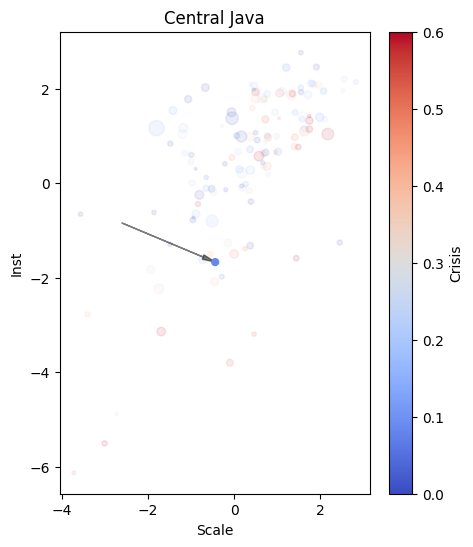

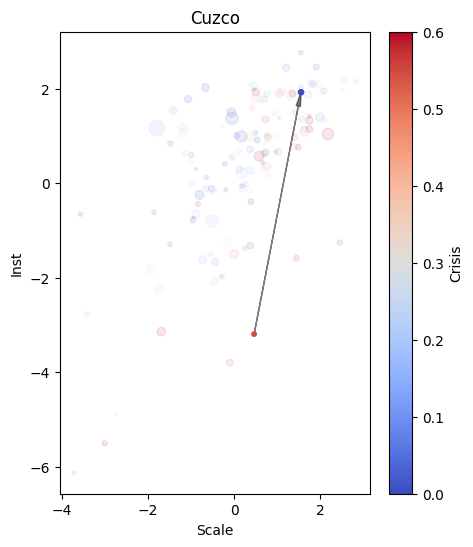

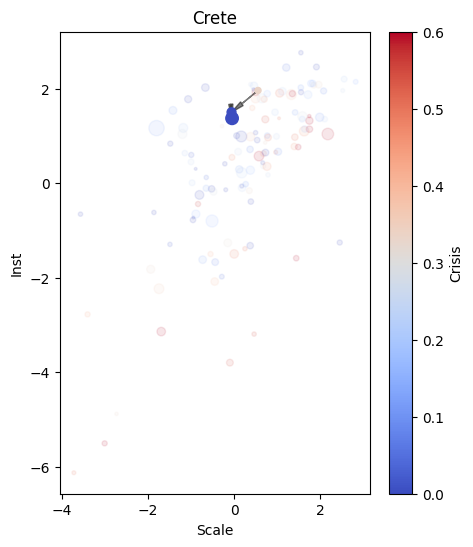

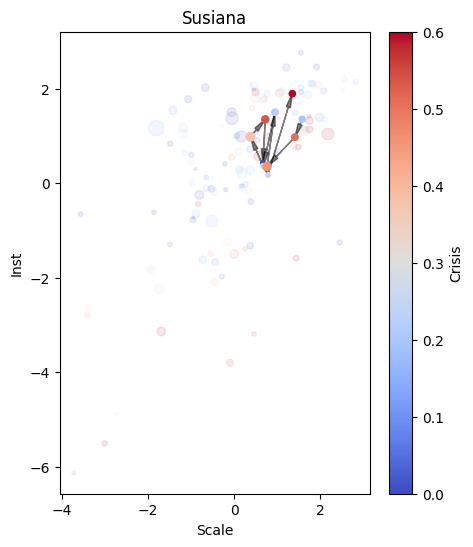

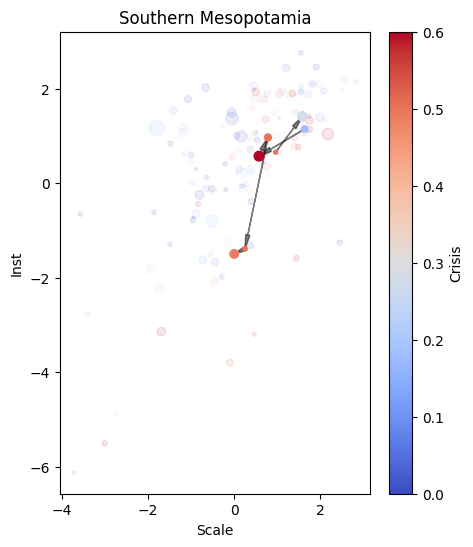

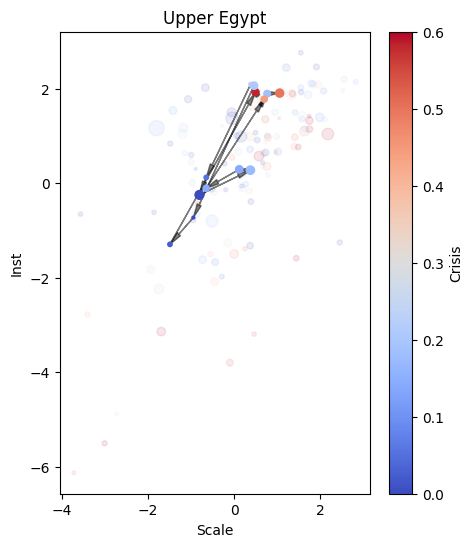

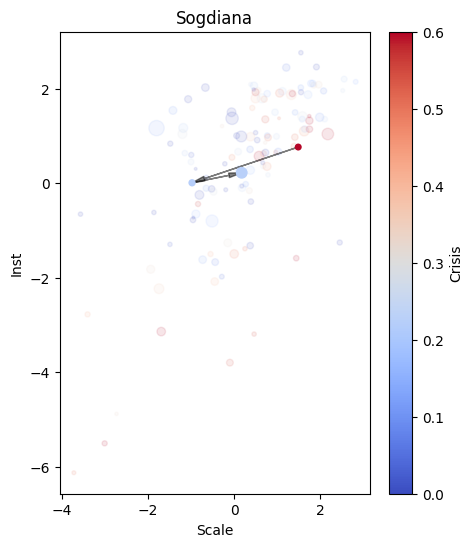

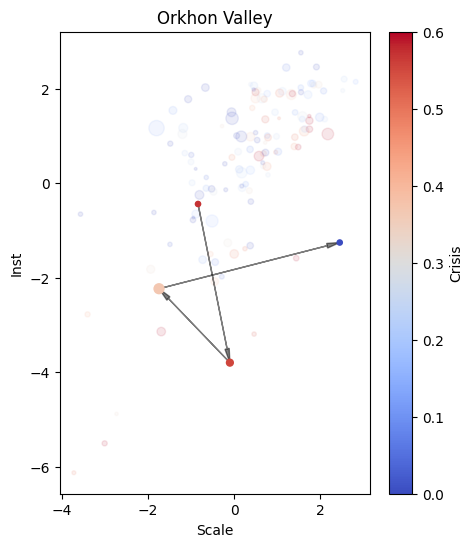

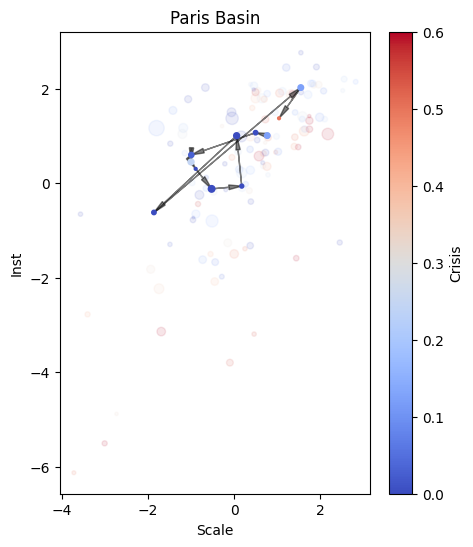

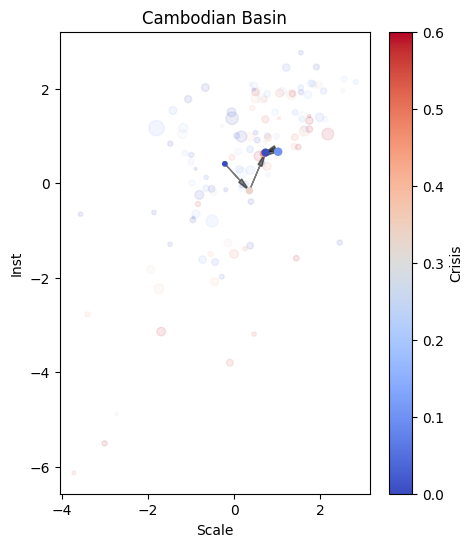

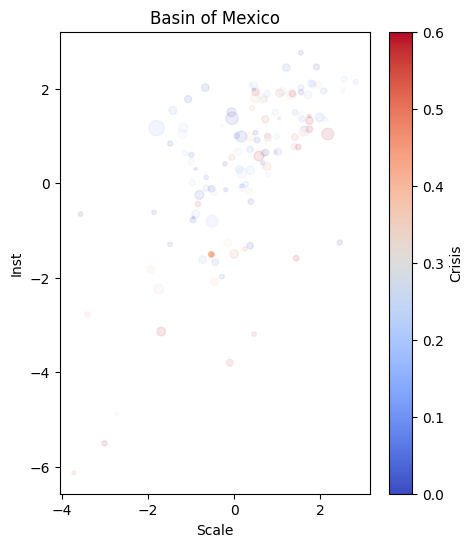

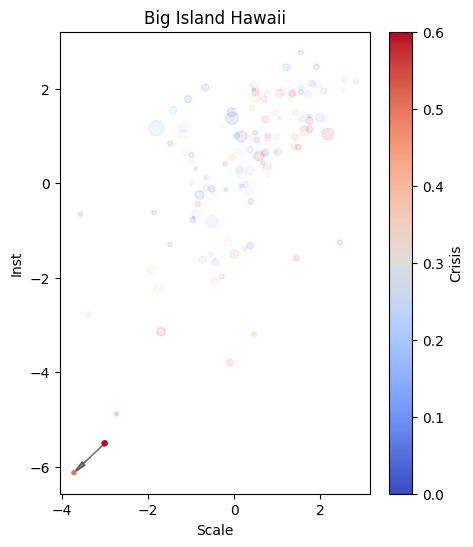

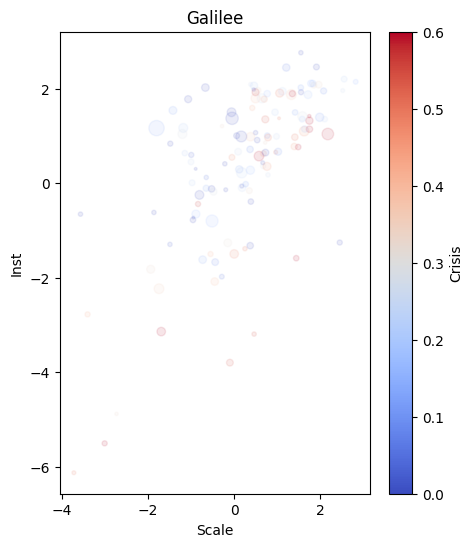

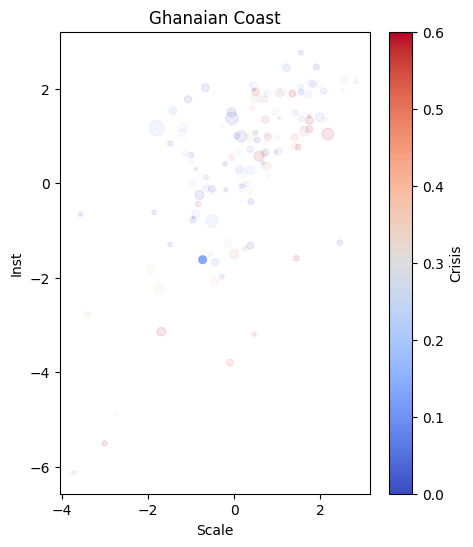

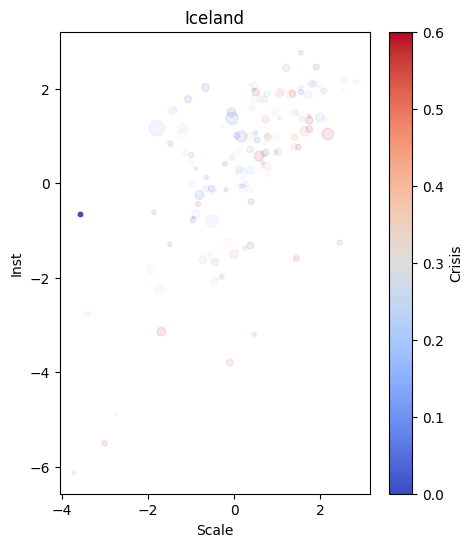

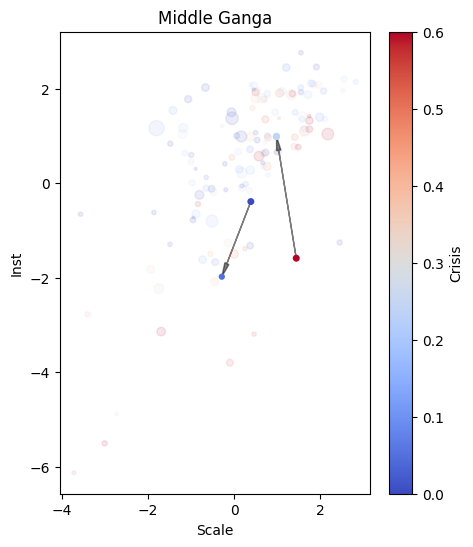

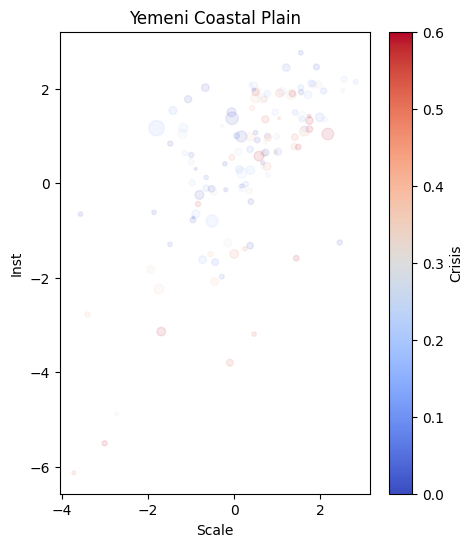

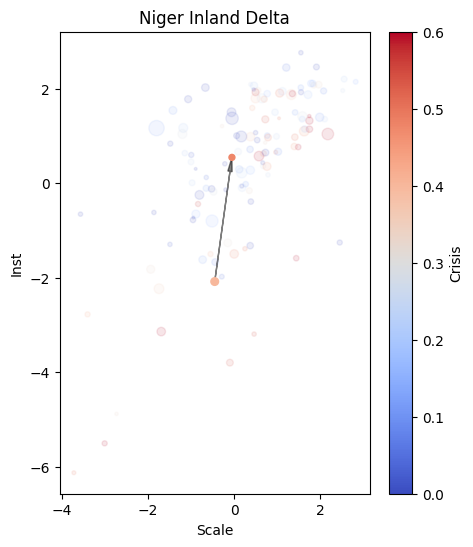

In [180]:
NGAs = dataset_PT.scv_imputed['NGA'].unique()

for nga in NGAs:
    polity_group = dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.NGA == nga].groupby('PolityName')

    dataset_plot = dataset_PT.scv_imputed
    dataset_plot.sort_values('Crisis', inplace=True,ascending=True)
    polity_group = dataset_PT.scv_imputed.groupby('PolityName')
    fig, ax = plt.subplots(figsize=(5, 6))
    # Assuming polity_group is a DataFrame or GroupBy object
    mean_inst_1 = polity_group['Inst_1'].mean()
    mean_scale_1 = polity_group['Scale_1'].mean()
    mean_crisis = polity_group['Crisis'].mean()
    num_observations = polity_group.size()

    threshold = 0.
    if threshold > 0:
        mean_inst_1 = mean_inst_1.loc[mean_crisis > threshold]
        mean_scale_1 = mean_scale_1.loc[mean_crisis > threshold]
        num_observations = num_observations[mean_crisis > threshold]
        mean_crisis = mean_crisis.loc[mean_crisis > threshold]


    v_max = mean_crisis.max()*0.6
    # Create a scatter plot
    scatter = plt.scatter(mean_scale_1, mean_inst_1,
                        vmin = 0,
                        vmax = v_max,
                        c=mean_crisis,
                        cmap='coolwarm',
                        s=num_observations * 2,
                        alpha=0.1,
                        edgecolors=plt.cm.coolwarm(mean_crisis / v_max)
                        )



    polity_group = dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.NGA == nga].groupby('PolityName')
    # Assuming polity_group is a DataFrame or GroupBy object
    mean_inst_1 = polity_group['Inst_1'].mean()
    mean_scale_1 = polity_group['Scale_1'].mean()
    mean_crisis = polity_group['Crisis'].mean()
    num_observations = polity_group.size()

    for i in range(1,len(mean_inst_1)):
        dx = (mean_scale_1[i-1] - mean_scale_1[i]) 
        dy = (mean_inst_1[i-1] - mean_inst_1[i]) 
        plt.arrow(mean_scale_1[i], mean_inst_1[i],dx,dy, head_width=0.1, head_length=0.3, fc='k', ec='k', length_includes_head = True, alpha = 0.5)
    # Create a scatter plot
    scatter = plt.scatter(mean_scale_1, mean_inst_1,
                        vmin = 0,
                        vmax = v_max,
                        c=mean_crisis,
                        cmap='coolwarm',
                        s=num_observations * 2,
                        alpha=1.0,
                        edgecolors=plt.cm.coolwarm(mean_crisis / v_max)
                        )

    # Add a color bar
    plt.colorbar(scatter, label='Crisis')

    # Show the plot
    plt.ylabel('Inst')
    plt.xlabel('Scale')
    plt.title(nga)
    plt.show()

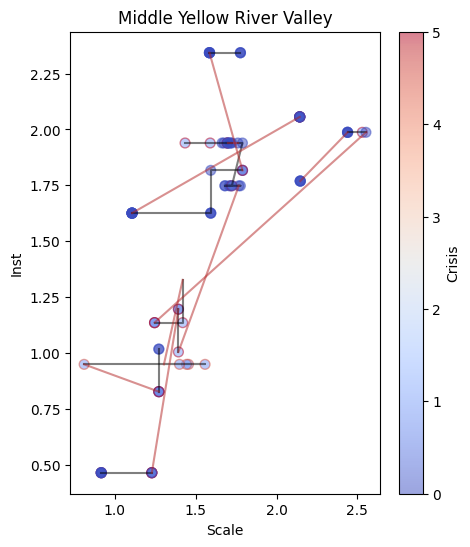

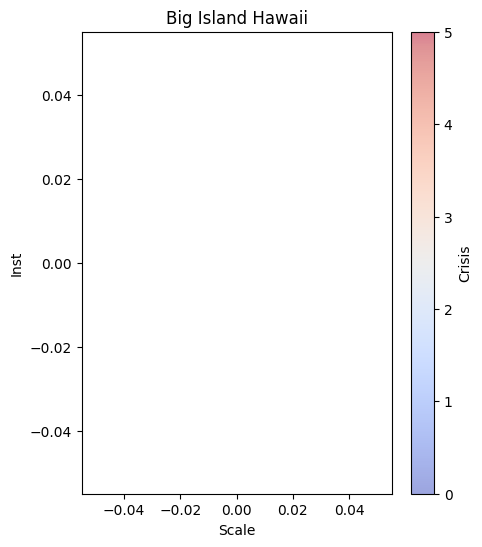

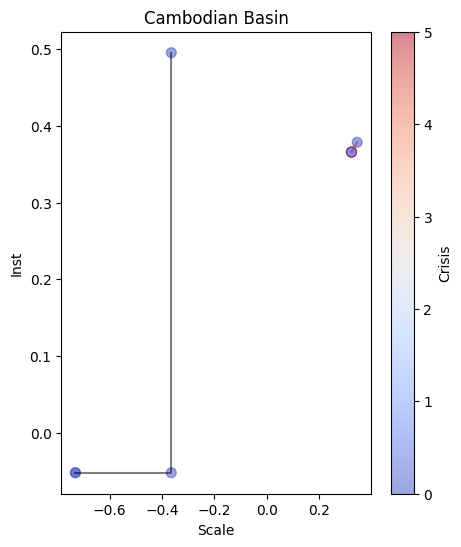

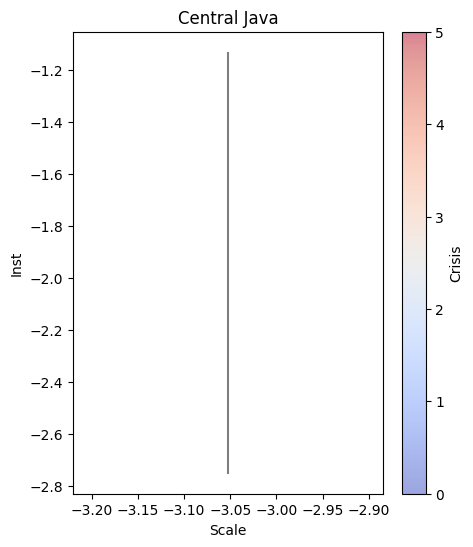

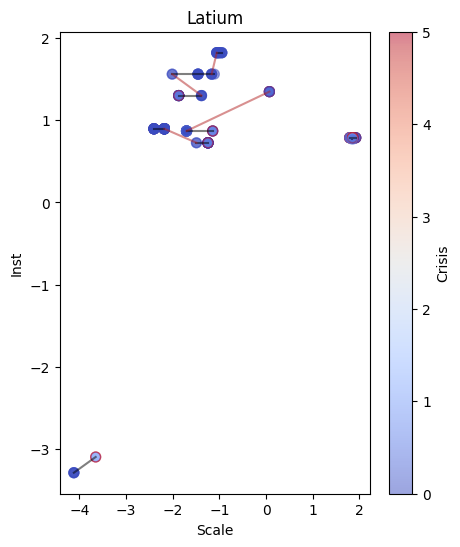

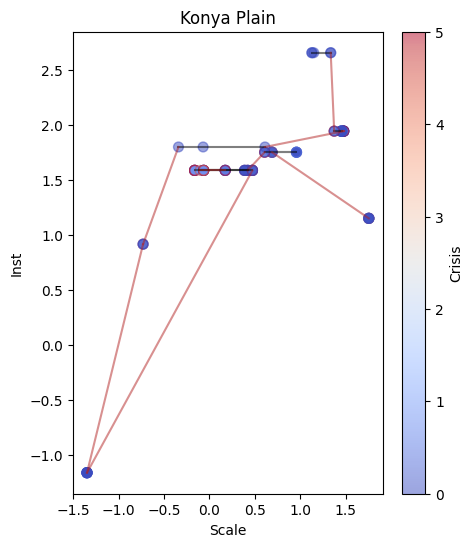

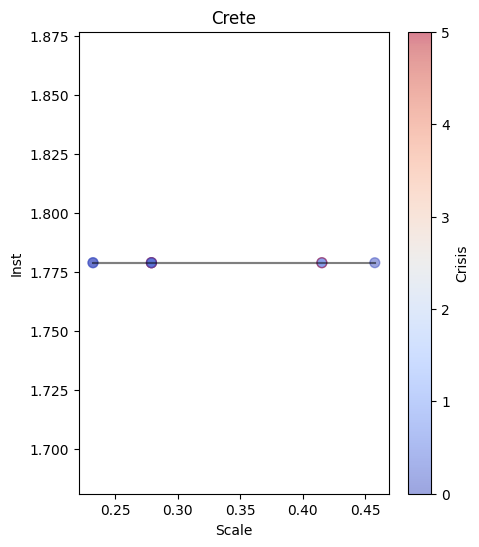

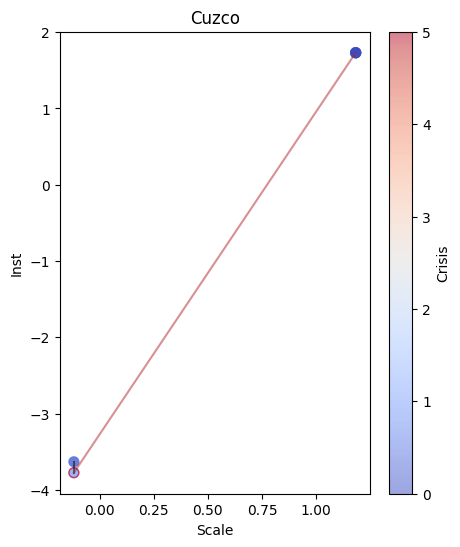

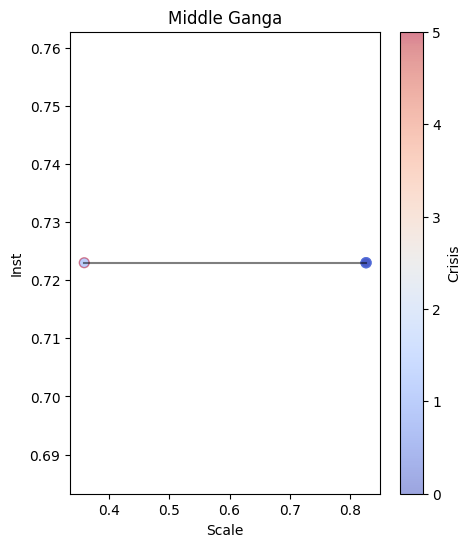

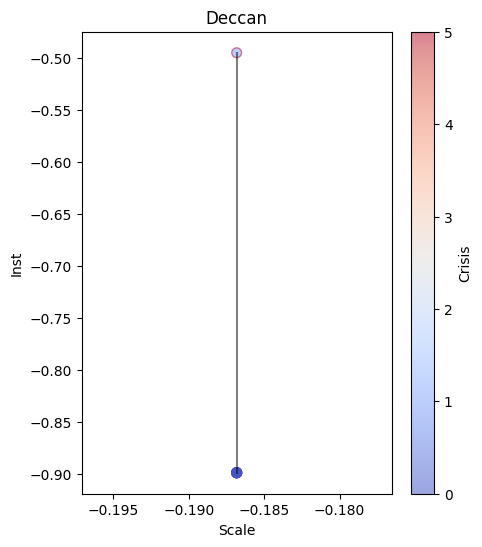

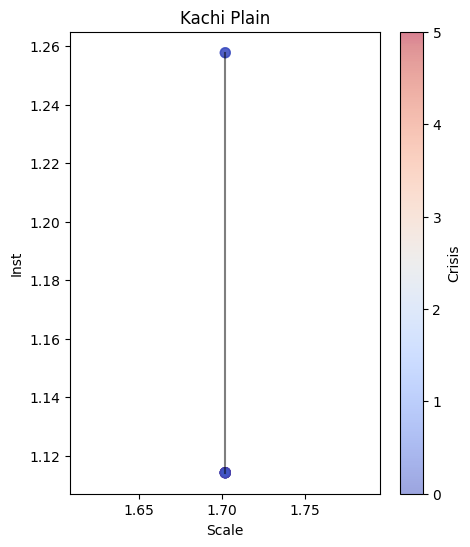

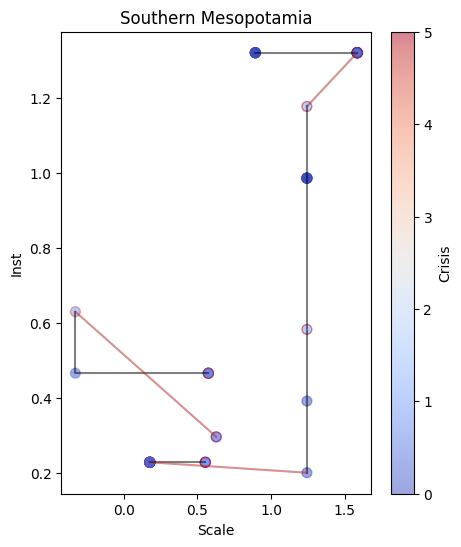

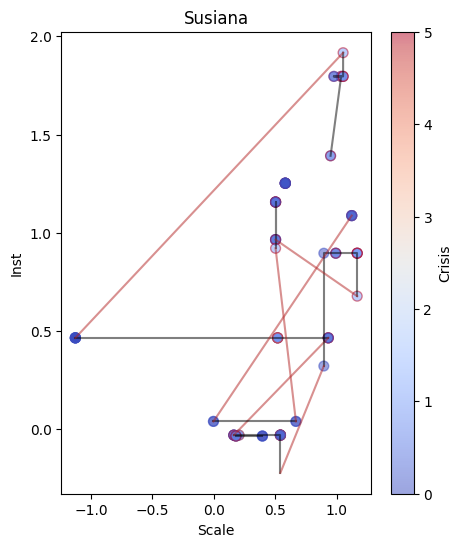

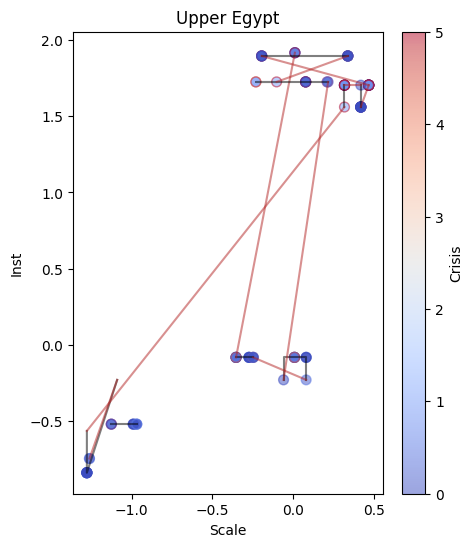

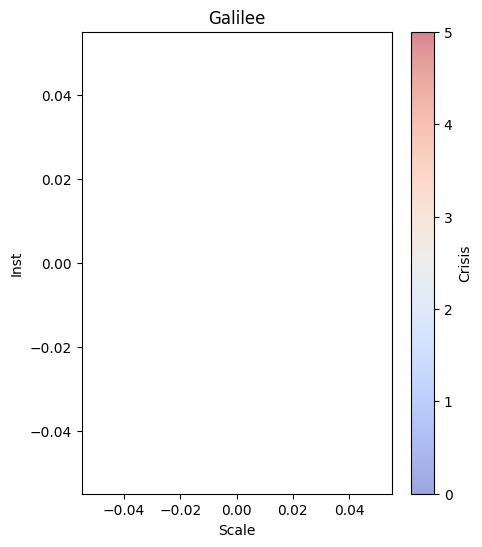

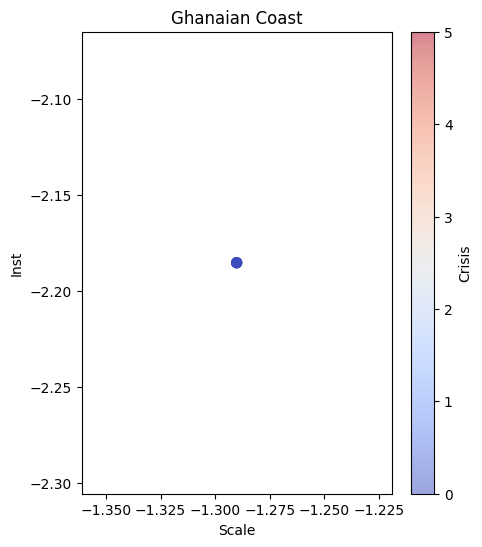

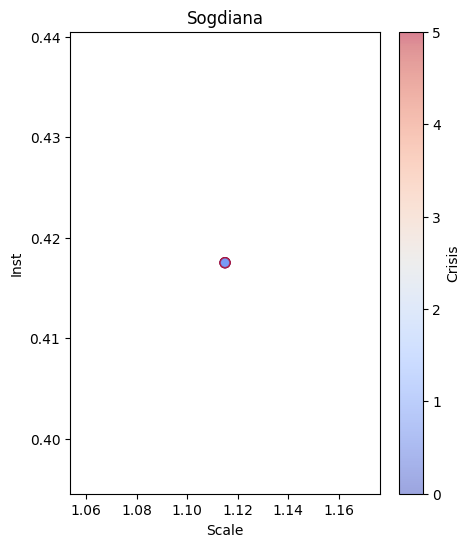

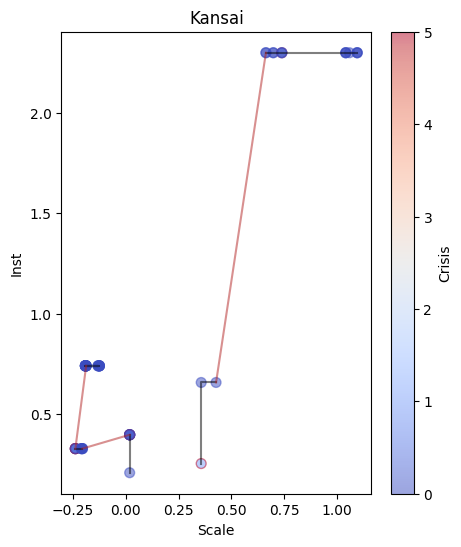

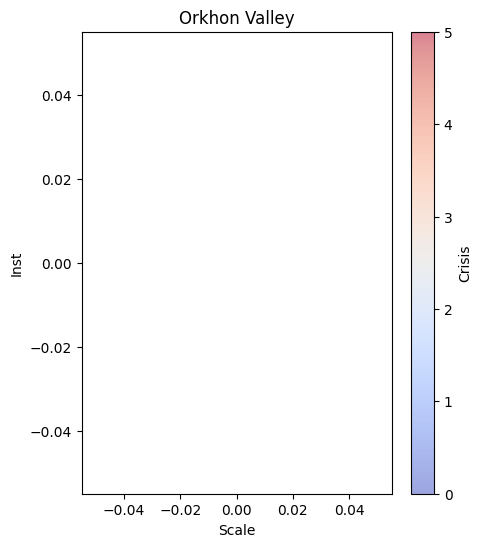

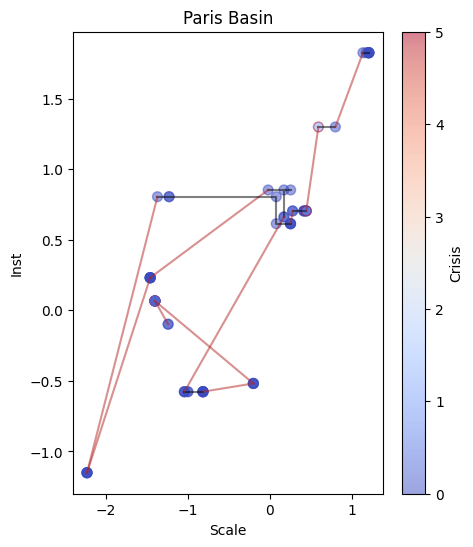

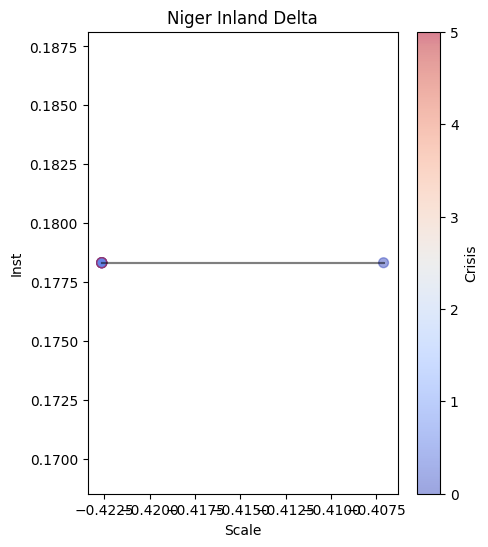

In [161]:
NGAs = dataset_PT.scv_imputed['NGA'].unique()

for nga in NGAs:

    plot_df = dataset_PT.scv_imputed[dataset_PT.scv_imputed['NGA'] == nga]
    if len(plot_df) > 10:                
        fig, ax = plt.subplots(figsize=(5, 6))

        # Create a scatter plot
        scatter = plt.scatter(plot_df['Scale_1'], plot_df['Inst_1'],
                            vmin=0,
                            vmax = 5,
                            c=plot_df['Crisis'],
                            cmap='coolwarm',
                            s=50,
                            alpha=0.5,
                            edgecolors=plt.cm.coolwarm(plot_df['Crisis'] / plot_df['Crisis'].max())
                            )
        for i,pol in enumerate(plot_df['PolityName'].unique()):
            pol_df = plot_df[plot_df['PolityName'] == pol]
            plt.plot(pol_df['Scale_1'], pol_df['Inst_1'], 'k', alpha=0.5)
            if i > 0:
                prev_pol = plot_df[plot_df['PolityName'] == plot_df['PolityName'].unique()[i-1]]
                plt.plot([prev_pol['Scale_1'].iloc[-1], pol_df['Scale_1'].iloc[0]], [prev_pol['Inst_1'].iloc[-1], pol_df['Inst_1'].iloc[0]], 'firebrick', alpha=0.5)
            
        
        # Add a color bar
        plt.colorbar(scatter, label='Crisis')         
        # Show the plot
        plt.title(nga)
        plt.ylabel('Inst')
        plt.xlabel('Scale')
        plt.show()  
    


In [162]:
import pyreadr
dat = pyreadr.read_r("/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/TableData.Rdata")
data = dat['ImpSCDat']
data = data.loc[data.Dupl == 'n']
polity_df = download_data("https://seshatdata.com/api/core/polities/")
polity_df['duration'] = polity_df['end_year'] - polity_df['start_year']

Downloaded 839 rows


In [163]:
old_names = dataset_PT.scv_imputed['PolityName'].apply(lambda x: polity_df.loc[polity_df.new_name == x, "name"].iloc[0] if x in polity_df.new_name.values else np.nan)
to_keep = dataset_PT.scv_imputed.loc[(old_names.isin(data['PolID']))]
to_keep['PolID'] = old_names

/var/folders/c3/82t48qlj2bg0xttc4k7vx70r0000gq/T/ipykernel_4662/673438035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_keep['PolID'] = old_names


KeyError: 'Column not found: PolityDuration'

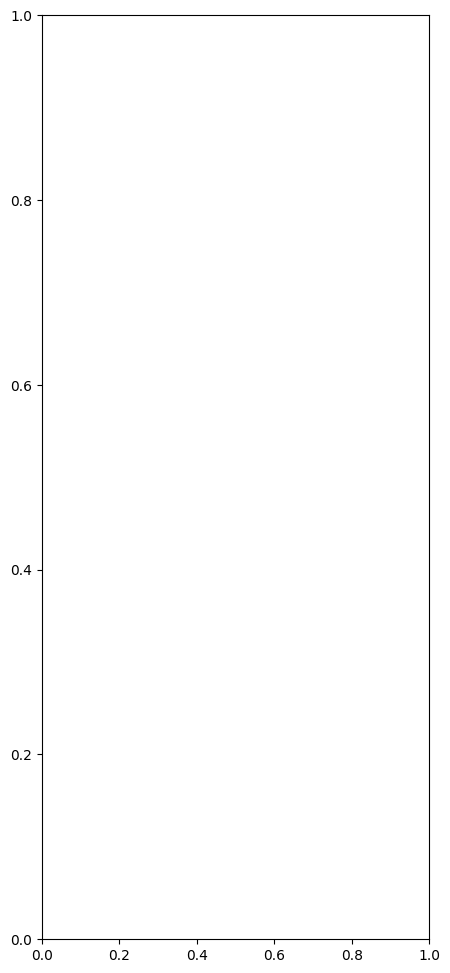

In [164]:
import matplotlib.pyplot as plt

polity_group = to_keep.groupby('PolID')
fig, ax = plt.subplots(figsize=(5, 12))
# Assuming polity_group is a DataFrame or GroupBy object
mean_inst_1 = polity_group['Inst_1'].mean()
mean_scale_1 = polity_group['Scale_1'].mean()
mean_crisis = polity_group['Crisis'].mean()
num_observations = polity_group.size()
duration = polity_group['PolityDuration'].mean()


threshold = 0.0
if threshold > 0:
    mean_inst_1 = mean_inst_1.loc[mean_crisis > threshold]
    mean_scale_1 = mean_scale_1.loc[mean_crisis > threshold]
    num_observations = num_observations[mean_crisis > threshold]
    duration = duration[mean_crisis > threshold]
    mean_crisis = mean_crisis.loc[mean_crisis > threshold]
    old_names = old_names.loc[old_names.isin(mean_crisis.index)]


v_max = 0.6 # mean_crisis.max()*.75
# Create a scatter plot
scatter = plt.scatter(mean_scale_1, mean_inst_1,
                      vmin = 0,
                      vmax = v_max,
                      c=mean_crisis,
                      cmap='jet',
                      s=num_observations * 5,
                      alpha=0.8,
                      edgecolors=plt.cm.jet(mean_crisis / v_max)
                      )

# Add a color bar
plt.colorbar(scatter, label='Crisis')
# add name of polity on each bubble
for i, txt in enumerate(mean_crisis.index):

    ax.annotate(txt, (mean_scale_1[i]-0.5, mean_inst_1[i]+0.1), fontsize=6)

# Show the plot
plt.ylabel('Inst')
plt.xlabel('Scale')
plt.show()


In [ ]:
new_pols = to_keep.PolID.unique()
old_pols = data.PolID.unique()
common_polities = np.intersect1d(new_pols, old_pols)

col_dict = {'Gov':'Government', 'Infra':'Infrastructure', 'Info':'Information', 'Hier':'Hierarchy'}
data.rename(columns=col_dict, inplace=True)
relevant_cols = ['Pop','Terr','Cap','Hierarchy','Government','Infrastructure','Information','MSP']
diffs = np.zeros((len(common_polities), len(relevant_cols)))

for pol in common_polities:
    new_pol = to_keep.loc[to_keep.PolID == pol]
    old_pol = data.loc[data.PolID == pol]
    for col in relevant_cols:
        diff = new_pol[col].mean() - old_pol[col].mean()
        if pd.isna(new_pol[col].mean()) and pd.isna(old_pol[col].mean()):
            diff = 0
        diffs[np.where(common_polities == pol)[0][0], relevant_cols.index(col)] = diff

In [ ]:
plt.pcolor(diffs, cmap='coolwarm')
plt.clim(-10,10)
plt.xticks(np.arange(0.5, len(relevant_cols), 1), relevant_cols, rotation=45)
# remove yticks
plt.yticks([])
plt.ylabel('Polities')

plt.colorbar()